# Adding predictors to your model

So far, we have only included continuous predictors in our linear regression models. However, you can also add categorical variables and interaction variables to your models. We will start by focusing on categorical variables, since they are used the most. 

## Categorical variables

Categorical or qualitative variables take on discrete values. Categorical variables can take on two or more values. For example, gender can take on two values (male or female), whereas movie genre can take on several discrete values (e.g. action, adventure, thriller, sci-Fi, drama, comedy).

Suppose that we want to investigate the difference in box office sales using advertising spending, the number of theatres, and whether the movie is rated R. This means that we will add a variable to our model that resolves to 1 if the movie is rated R and 0 otherwise. This type of binary variable is often called a dummy variable. We will now build a multiple linear regression model with the dummy variable included.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

#Make the data
#y are box office revenues, x1: advertising,x2: number of theaters, dummy: rated R  
d1 = {"y":[23,12,36,27,45,70,55,8,62,28],
     "x1":[29,49,89,110,210,190,153,20,122,41],
     "x2": [2.036,2.919,1.707,1.505,2.232,2.910,2.795,1.46,3.288,1.838],
     "dummy": [1,1,0,1,1,0,0,1,0,0]
    }
data1 = pd.DataFrame(data = d1)

#Build OLS model
data1 = sm.add_constant(data1)
lm1 = sm.OLS(data1["y"],data1[["const","x1", "x2", "dummy"]]).fit()
print(lm1.summary())

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     23.31
Date:                Mon, 01 Jul 2019   Prob (F-statistic):            0.00105
Time:                        14:26:01   Log-Likelihood:                -31.386
No. Observations:                  10   AIC:                             70.77
Df Residuals:                       6   BIC:                             71.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4045     10.382      1.195      0.2

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## How do we interpret the dummy coefficient? 

If the movie is not rated R, the dummy variable is zero so the equation becomes: 12.40 + 0.189x1 + 6.15x2. Hence, the intercept (12.40) represent the average sales among movies that are not rated R. If the dummy variable becomes 1, then the equation changes to: 12.40 + 0.189x1 + 6.15x2 -17.6097. The intercept changes (12.40 - 17.61) and represents the average box office sales when the movie is rated. So a dummy variable changes the intercept, but does not affect interpretation of the coefficients of the predictors. 

To make the interpretation more clear, let's make a linear regression model with advertising and the dummy variable for rated R and plot the regression lines. 

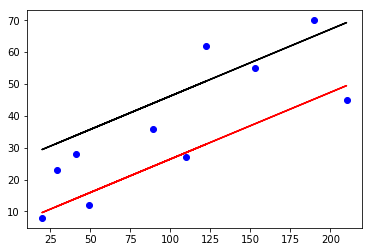

In [2]:
#Make the data
#y are box office revenues, x1: advertising, dummy: rated R  
d2 = {"y":[23,12,36,27,45,70,55,8,62,28],
     "x1":[29,49,89,110,210,190,153,20,122,41],
     "dummy": [1,1,0,1,1,0,0,1,0,0]
    }
data2 = pd.DataFrame(data = d2)

#Make an OLS
data2 = sm.add_constant(data2)
lm2 = sm.OLS(data2["y"],data2[["const","x1", "dummy"]]).fit()

#Make a plot with the two regression lines

#Make a scatter plot of the y and x1
x_plot = data2[['x1']]
y_plot = data2[['y']]
plt.scatter(x_plot,y_plot, color = "blue")

#Add the regression line for non R-rated movies (black)
plt.plot(x_plot, lm2.params[0] + lm2.params[1]*x_plot, color = "black")

#Add the regression line for R-rated movies (red)
plt.plot(x_plot, lm2.params[0] + lm2.params[1]*x_plot + lm2.params[2], color = "red")

plt.show()

As you can see from the scatter plot, the black (not R-rated movie) and the red line (R-rated) movie are parallel. This means that a dummy variable will make sure that the intercept of the regression line changes, but not the slope. The slope is the same for both R-rated and non R-rated movies.

## Categorical variables with more than two levels

If there are more than two levels, we have to create additional dummy variables. In general, if a variable has *c* categories, than we create *c-1* dummy variables, where each variable resolves to 1 if the the observation is equal to that category and 0 otherwise. So there will always be one less dummy variable than the number of categories. The category with no dummy variable is referred to as the 'reference class' or 'baseline'. This technique of transforming categorical variables to dummy variables is called one-hot encoding. 

Consider the following example, where we add genre to the box office sales example:

In [3]:
#Make the data
#y are box office revenues, x1: advertising, dummy: rated R  
d3 = {"y":[23,12,36,27,45,70,55,8,62,28],
     "x1":[29,49,89,110,210,190,153,20,122,41],
     "dummy": ["Action","Drama","Adventure","Action","Comedy","Sci-Fi","Drama","Horror","Comedy","Action"]
    }
data3 = pd.DataFrame(data = d3)

#This function will create a dummy for every genre
dummies = pd.get_dummies(data3['dummy'])

#Delete one genre as reference category (e.g., Horror)
dummies = dummies.drop("Horror", axis = 1)

#Add the dummies to the orginal data
#Make sure that you delete the dummy category
final = pd.concat([data3.reset_index(drop=True), dummies], axis = 1)
final = final.drop("dummy", axis = 1)

#This data set can be used to build a OLS model. As an exercise, try to build an OLS model and see how the results differ!

## Interaction variables

In the previous examples of box office sales, we always assumed that the amount of advertising spent or the number of theatres were independent of each other. The average effect of number of theatres on box office sales was calculated regardless of the advertising spent. However, it could be that the effect of the number of theatres playing a movie increases with more advertising spent. Another example could be that the advertising spent is more effective for non R-rated movies of particular genres. So, an interaction effect will test whether one effect amplifies the other. This is exactly what an interaction effect is trying to prove.

If we include the interaction of advertising spent and whether or not the movie is R-rated, the interaction term makes sure that not only the intercept for R-rated movies is different, but also the slope. In our case, the effect of advertising is higher for non R-rated movies (black) than for R-rated (red). 

In [4]:
#Use data2 but add the interaction effect
data4 = data2
data4["x1dummy"] = data4["x1"]*data4["dummy"] 

#Make an OLS model
lm4 = sm.OLS(data4["y"],data4[["const","x1", "dummy", "x1dummy"]]).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     23.76
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           0.000993
Time:                        14:37:27   Log-Likelihood:                -31.298
No. Observations:                  10   AIC:                             70.60
Df Residuals:                       6   BIC:                             71.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2593      8.062      2.017      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


We discover from the output that the intercept changes when the movie is R-rated (16.26 - 7.43). The slope also changes (0.29 - 0.12). This means that the effect of advertising spent on box office sales is higher for non R-rated movies. This is also clear when we make a plot of the regression lines:

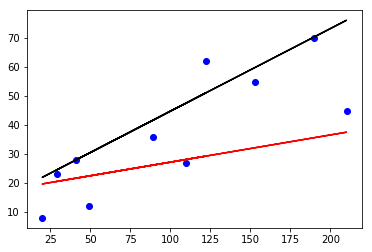

In [5]:
#Make a plot with the two regression lines
#Make a scatter plot of the y and x1
x_plot = data4[['x1']]
y_plot = data4[['y']]
plt.scatter(x_plot,y_plot, color = "blue")

#Add the regression line for non R-rated movies (black)
plt.plot(x_plot, lm4.params[0] + lm4.params[1]*x_plot, color = "black")

#Add the regression line for R-rated movies (red)
plt.plot(x_plot, lm2.params[0] + lm2.params[1]*x_plot + lm4.params[2] + lm4.params[3]*x_plot,color = "red")

plt.show()